Dissimilarity Results:
                       Method  Dissimilarity
0     Heuristic (New Formula)       0.001321
1         Naive (New Formula)       0.003082
2  Jaro-Winkler (New Formula)       0.000000


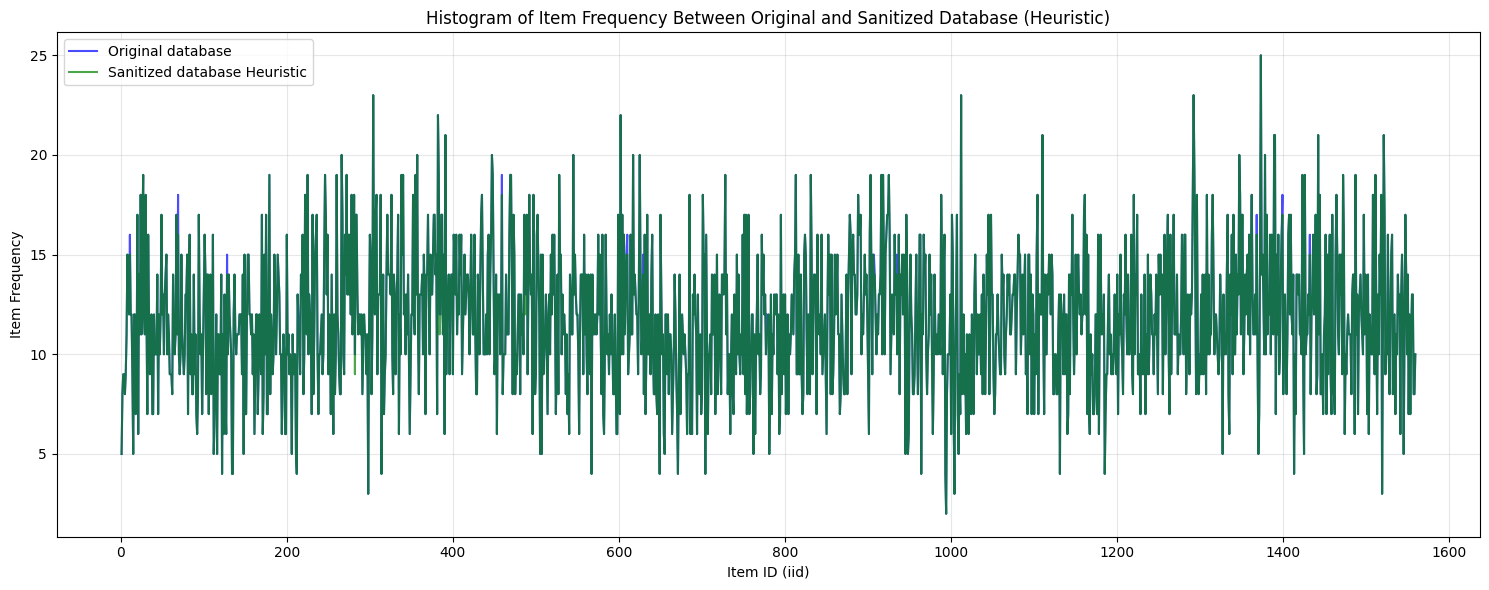

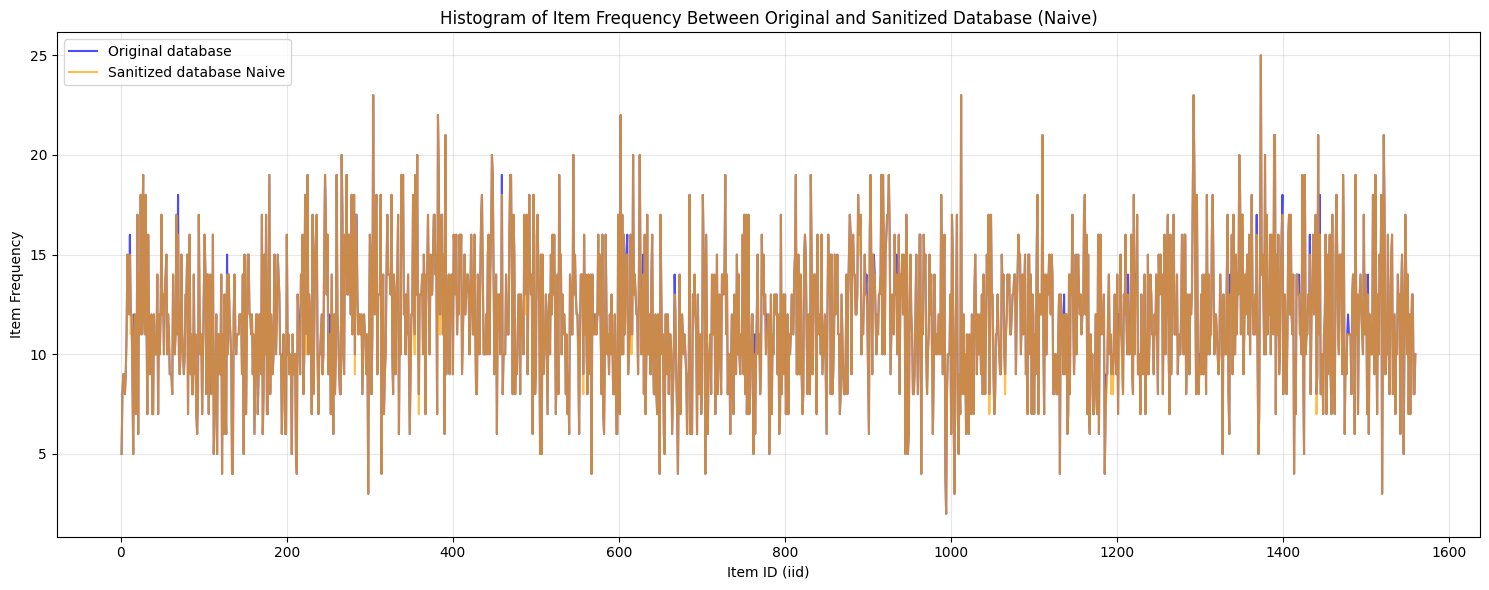

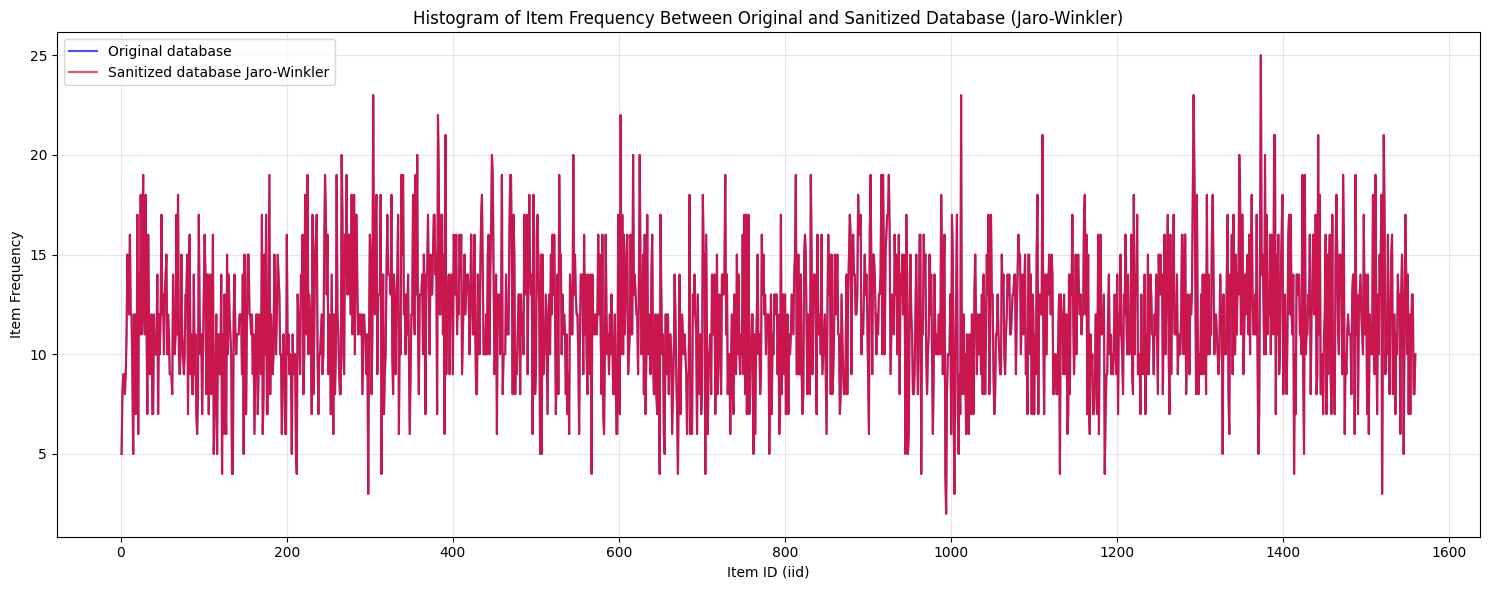

In [6]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np

def load_dataset(file_path):
    with open(file_path, 'r') as file:
        return [set(map(int, line.strip().split())) for line in file]

def get_item_frequencies(dataset):
    item_counts = Counter()
    for transaction in dataset:
        item_counts.update(transaction)
    return item_counts

def calculate_dissimilarity_new(original_frequencies, modified_frequencies):
    total_original = sum(original_frequencies)
    total_modified = sum(modified_frequencies)

    diff = abs(total_original - total_modified)
    dissimilarity = (1 / total_original) * diff if total_original > 0 else None
    return dissimilarity

original_path = 'foodmartFIM.txt'
heuristic_path = 'heuristic_foodmart.txt'
naive_path = 'Naive_foodmartFIM.txt'
jaro_winkler_path = 'jw.txt'

original_data = load_dataset(original_path)
heuristic_data = load_dataset(heuristic_path)
naive_data = load_dataset(naive_path)
jw_data = load_dataset(jaro_winkler_path)

freq_original = get_item_frequencies(original_data)
freq_heuristic = get_item_frequencies(heuristic_data)
freq_naive = get_item_frequencies(naive_data)
freq_jw = get_item_frequencies(jw_data)

sorted_items = sorted(freq_original.keys())
original_frequencies = [freq_original[item] for item in sorted_items]
heuristic_frequencies = [freq_heuristic.get(item, 0) for item in sorted_items]
naive_frequencies = [freq_naive.get(item, 0) for item in sorted_items]
jw_frequencies = [freq_jw.get(item, 0) for item in sorted_items]


min_supp = [0.0003, 0.001]
subset_fraction = 0.5
avg_transaction_length = 4

subset_size = int(len(freq_original) * subset_fraction)
subset_items = sorted_items[:subset_size]

freq_original_subset = [freq_original[item] for item in subset_items]
freq_heuristic_subset = [freq_heuristic.get(item, 0) for item in subset_items]
freq_naive_subset = [freq_naive.get(item, 0) for item in subset_items]
freq_jw_subset = [freq_jw.get(item, 0) for item in subset_items]

dissimilarity_heuristic_new = calculate_dissimilarity_new(freq_original_subset, freq_heuristic_subset)
dissimilarity_naive_new = calculate_dissimilarity_new(freq_original_subset, freq_naive_subset)
dissimilarity_jw_new = calculate_dissimilarity_new(freq_original_subset, freq_jw_subset)

dissimilarity_results = {
    "Heuristic (New Formula)": dissimilarity_heuristic_new,
    "Naive (New Formula)": dissimilarity_naive_new,
    "Jaro-Winkler (New Formula)": dissimilarity_jw_new
}

results_df = pd.DataFrame(list(dissimilarity_results.items()), columns=["Method", "Dissimilarity"])
print("Dissimilarity Results:")
print(results_df)

plt.figure(figsize=(15, 6))
plt.plot(sorted_items, original_frequencies, label="Original database", color='blue', alpha=0.7)
plt.plot(sorted_items, heuristic_frequencies, label="Sanitized database Heuristic", color='green', alpha=0.7)
plt.xlabel("Item ID (iid)")
plt.ylabel("Item Frequency")
plt.title("Histogram of Item Frequency Between Original and Sanitized Database (Heuristic)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(sorted_items, original_frequencies, label="Original database", color='blue', alpha=0.7)
plt.plot(sorted_items, naive_frequencies, label="Sanitized database Naive", color='orange', alpha=0.7)
plt.xlabel("Item ID (iid)")
plt.ylabel("Item Frequency")
plt.title("Histogram of Item Frequency Between Original and Sanitized Database (Naive)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(sorted_items, original_frequencies, label="Original database", color='blue', alpha=0.7)
plt.plot(sorted_items, jw_frequencies, label="Sanitized database Jaro-Winkler", color='red', alpha=0.7)
plt.xlabel("Item ID (iid)")
plt.ylabel("Item Frequency")
plt.title("Histogram of Item Frequency Between Original and Sanitized Database (Jaro-Winkler)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
